In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("headbrain.csv")
print(dataset.head())
print(dataset.shape)

   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590
(237, 4)


In [2]:
dataset.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [3]:
dataset.info

<bound method DataFrame.info of      Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0         1          1             4512                 1530
1         1          1             3738                 1297
2         1          1             4261                 1335
3         1          1             3777                 1282
4         1          1             4177                 1590
..      ...        ...              ...                  ...
232       2          2             3214                 1110
233       2          2             3394                 1215
234       2          2             3233                 1104
235       2          2             3352                 1170
236       2          2             3391                 1120

[237 rows x 4 columns]>

In [4]:
dataset.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [30]:
X= dataset["Head Size(cm^3)"].values

In [31]:
X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [32]:
X.shape

(237,)

In [33]:
Y = dataset["Brain Weight(grams)"].values

In [35]:
Y

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375, 1340,
       1380, 1355, 1522, 1208, 1405, 1358, 1292, 1340, 1400, 1357, 1287,
       1275, 1270, 1635, 1505, 1490, 1485, 1310, 1420, 1318, 1432, 1364,
       1405, 1432, 1207, 1375, 1350, 1236, 1250, 1350, 1320, 1525, 1570,
       1340, 1422, 1506, 1215, 1311, 1300, 1224, 1350, 1335, 1390, 1400,
       1225, 1310, 1560, 1330, 1222, 1415, 1175, 1330, 1485, 1470, 1135,
       1310, 1154, 1510, 1415, 1468, 1390, 1380, 1432, 1240, 1195, 1225,
       1188, 1252, 1315, 1245, 1430, 1279, 1245, 1309, 1412, 1120, 1220,
       1280, 1440, 1370, 1192, 1230, 1346, 1290, 1165, 1240, 1132, 1242,
       1270, 1218, 1430, 1588, 1320, 1290, 1260, 1425, 1226, 1360, 1620,
       1310, 1250, 1295, 1290, 1290, 1275, 1250, 1270, 1362, 1300, 1173,
       1256, 1440, 1180, 1306, 1350, 1125, 1165, 1312, 1300, 1270, 1335,
       1450, 1310, 1027, 1235, 1260, 1165, 1080, 1127, 1270, 1252, 1200,
       1290, 1334, 1380, 1140, 1243, 1340, 1168, 13

In [36]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

m = len(X)

numer=0
denom=0

for i in range(m):
    numer += (X[i]-mean_x)*(Y[i]-mean_y)
    denom += (X[i]-mean_x)**2
    
b1 = numer/denom
b0 = mean_y - (b1*mean_x)

print(b1,b0)

0.26342933948939945 325.57342104944223


# y = mx + c  FORMULA

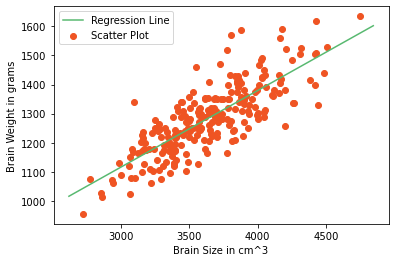

In [42]:
max_x = np.max(X)+100
min_x = np.min(X)-100

x= np.linspace(max_x,min_x,1000)
y=b0 + b1*x

plt.plot(x,y,color='#58b970',label='Regression Line')
plt.scatter(X,Y,c='#ef5423',label='Scatter Plot')

plt.xlabel('Brain Size in cm^3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [43]:
ss_t = 0
ss_r = 0

for i in range(m):
    y_pred = b0 + b1*X[i]
    ss_t += (Y[i]-mean_y)**2
    ss_r += (Y[i]-y_pred)**2
    
r2 = 1-(ss_r/ss_t)
print(r2)

0.6393117199570003


# ABOVE IMPLEMENTATION USING SCIKIT LEARN

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
X=X.reshape((m,1))
reg= LinearRegression()
reg = reg.fit(X,Y)
Y_pred = reg.predict(X)

r2_score = reg.score(X,Y)
print(r2_score)

0.639311719957
